In [1]:
import pandas as pd
import matplotlib.pyplot as mpp
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb

In [2]:
dataFrame = pd.read_csv('archive/Mall_Customers.csv')
dataFrame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## PREPROCESSING

In [3]:
# rename kolom header
dataFrame = dataFrame.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
#replace data
dataFrame['gender'].replace(['Female','Male'],[0,1],inplace=True)

In [4]:
dataFrame.head(10)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   gender          200 non-null    int64
 2   age             200 non-null    int64
 3   annual_income   200 non-null    int64
 4   spending_score  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [6]:
x = dataFrame.drop(columns=['CustomerID','gender'], axis=1)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             200 non-null    int64
 1   annual_income   200 non-null    int64
 2   spending_score  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


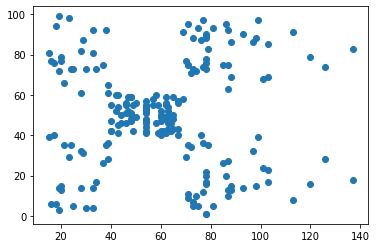

In [9]:
fig, ax = mpp.subplots()
mpp.scatter(x['annual_income'], x['spending_score'] )

In [10]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

Text(0, 0.5, 'inertia')

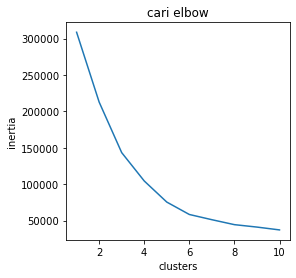

In [11]:
fig,ax = mpp.subplots(figsize = (4,4))
sb.lineplot(x=list(range(1,11)),y=clusters, ax = ax)
ax.set_title("cari elbow")
ax.set_xlabel("clusters")
ax.set_ylabel("inertia")

## Train data

In [12]:
km5 = KMeans(n_clusters=5).fit(x)
x['Labels'] = km5.labels_

In [13]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(x[['annual_income','spending_score']],x["Labels"])
centroid = clf.centroids_
centroid = pd.DataFrame(centroid,columns=['x','y'])
centroid

/home/ryuujin/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,x,y
0,55.291139,49.569620
1,26.304348,20.913043
2,26.304348,78.565217
3,87.750000,17.583333
4,86.538462,82.128205


Text(0.5, 1.0, 'KMeans dengan 5 Cluster')

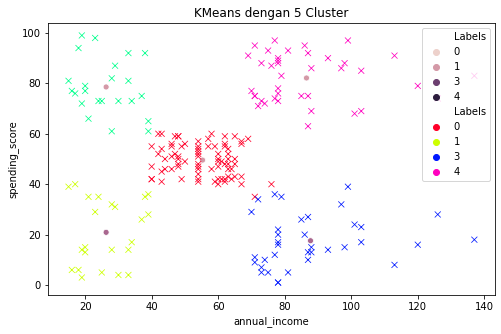

In [18]:
mpp.figure(figsize=(8,5))
mpp.xlabel("annual_income")
mpp.ylabel("spending_score")
axx = sb.scatterplot(centroid['x'],centroid['y'], color="black")
sb.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
                palette="gist_rainbow", marker="x")
mpp.title('KMeans dengan 5 Cluster')

In [15]:
data = x.groupby(['Labels'])['Labels'].count()
data

Labels
0    79
1    23
2    23
3    36
4    39
Name: Labels, dtype: int64

In [16]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n ({v:d})'.format(p=pct,v=val)
    return my_autopct

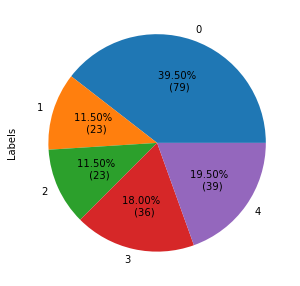

In [17]:
mpp.figure(figsize=(5,5))
data.plot.pie(autopct=make_autopct(data))